In [199]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [30]:
# Read the csv file

df = pd.read_csv('data/coupons.csv')

In [10]:
# Print the first 5 rows of the data frame

data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [14]:
# Find the row & column count

data.shape

(12684, 26)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [18]:
# Get the unique income gaps

data['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [22]:
# Get the  count of 'total' null value for each column attribute

data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [24]:
# Get the  count of 'total' null value across all column attributes

data.isnull().sum().sum()

13370

In [26]:
# Calculate statistical data - percentile, mean and std in the current DataFrame

data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# calculation - the coupon accepted count

coupon_accepted = df['Y'].value_counts()[1]

# calculate the total coupon offered count

total_coupon_offered = df['Y'].count()

# calculate the proportion of coupon acceptance

proportion_of_coupon_acceptance = round((coupon_accepted/total_coupon_offered)*100,2)

proportion_of_coupon_acceptance

56.84

Text(0.5, 1.0, 'Coupon Type by Count')

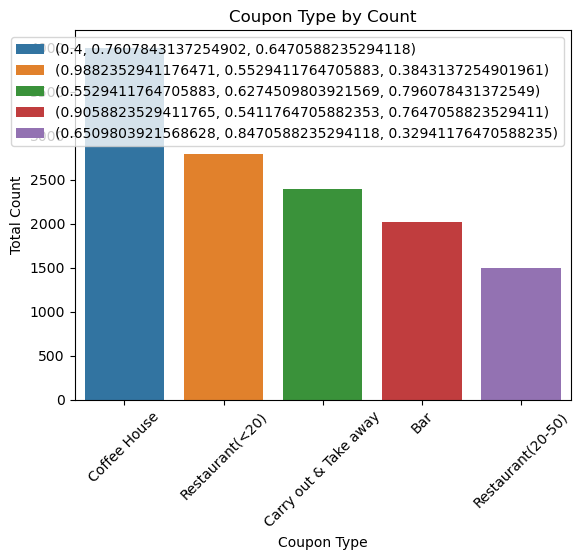

In [52]:
# Below bar plot shows the coupon column with all its unique values with count
unique_coupons = df.coupon.nunique()
palette = sns.color_palette("Set2", unique_coupons)
g1 = sns.barplot(x=df.coupon.value_counts().index, 
                 y=df.coupon.value_counts(), hue=palette)
g1.tick_params(axis='x', rotation=45)
g1.set(xlabel='Coupon Type', ylabel='Total Count')
g1.set_title('Coupon Type by Count')

Text(0.5, 1.0, 'Coupon Type by Count')

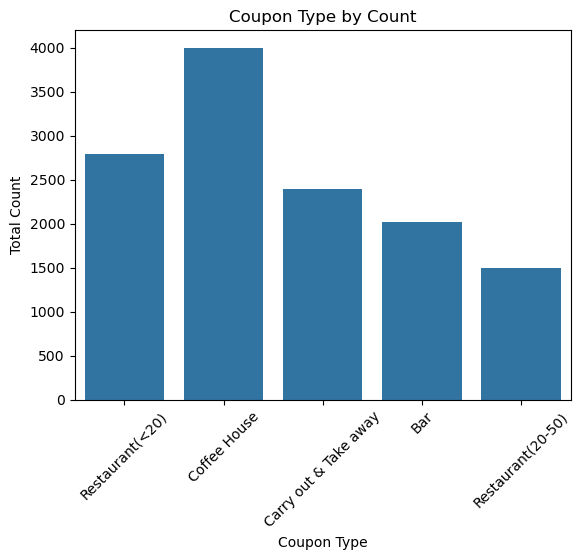

In [201]:
# Below is the same equivalent of above but done using count plot

g2 = sns.countplot(data = df, x='coupon')
g2.tick_params(axis='x', rotation=45)
g2.set(xlabel='Coupon Type', ylabel='Total Count')
g2.set_title('Coupon Type by Count')

Text(0.5, 1.0, 'Temperature Histogram')

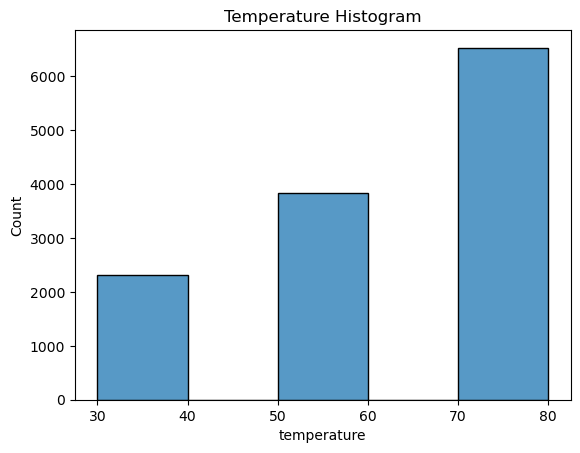

In [60]:
# histogram to visualize temperature
g3 = sns.histplot(data=df, x='temperature', binwidth=10)
g3.set_title('Temperature Histogram')

In [62]:
# Analyze Bar Coupons

# Let's first find the unique values of 'coupon' column to see all the available choices

df['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [68]:
# Create a new dataframe that is filtered for bar coupon only

df_bar_coupons = df.query("coupon == 'Bar'")
df_bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


In [70]:
# Check the size of the new filtered dataframe, in terms of rows and columns

df_bar_coupons.shape

(2017, 26)

In [72]:
# Lets first calculate the bar coupon accepted count

bar_coupon_accepted = df_bar_coupons['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count

total_bar_coupon_offered = df_bar_coupons['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values

proportion_of_bar_coupon_acceptance = round((bar_coupon_accepted/total_bar_coupon_offered)*100,2)

proportion_of_bar_coupon_acceptance

41.0

In [74]:
# Lets first calculate the bar coupon not accepted count

bar_coupon_not_accepted = df_bar_coupons['Y'].value_counts()[0]

# Lets calculate the total bar coupon offered count

total_bar_coupon_offered = df_bar_coupons['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values

proportion_of_bar_coupon_not_accepted = round((bar_coupon_not_accepted/total_bar_coupon_offered)*100,2)

proportion_of_bar_coupon_not_accepted

59.0

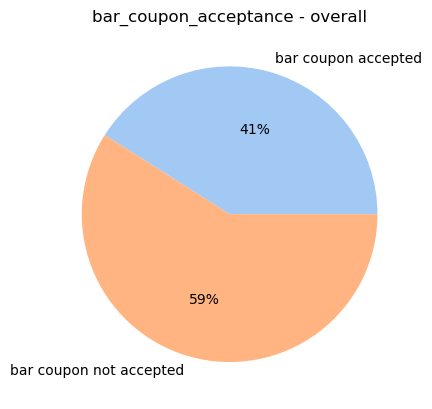

In [76]:
#define data
data = [proportion_of_bar_coupon_acceptance, proportion_of_bar_coupon_not_accepted]
labels = ['bar coupon accepted', 'bar coupon not accepted']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('bar_coupon_acceptance - overall')
plt.show()

In [78]:
# Let's find all the unique values for the Bar column

df_bar_coupons['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [80]:
# Let's create a simple list to keep only more frequent entries

more_frequent = ['gt8', '4~8']

# Now, use the list and create a new column with condition based

df_bar_coupons['Bar_More_Frequent'] = np.where(df_bar_coupons['Bar'].isin(['gt8', '4~8']), 1, 0)

# Now, validate where the new column is present and the value counts are as expected

df_bar_coupons['Bar_More_Frequent'].value_counts()

# This column now simply says whether a person is a frequent visitor to the bar or not

/var/folders/tt/hs7zz4g973j0fv52r83jp5gm0000gn/T/ipykernel_42915/3216670899.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Bar_More_Frequent
0    1818
1     199
Name: count, dtype: int64

In [ ]:
# Total who went to bar frequently = 199
# Total who did not go to bar frequently = 1818

In [82]:
# Lets first calculate the bar coupon accepted count for frequent visitors

bar_coupon_accepted_more_frequent_visitors = df_bar_coupons.query("Bar_More_Frequent == 1")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for frequent visitors

total_bar_coupon_offered_frequent_visitors = df_bar_coupons.query("Bar_More_Frequent == 1")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for frequent visitors

proportion_of_bar_coupon_acceptance_frequent_visitors = round((bar_coupon_accepted_more_frequent_visitors/total_bar_coupon_offered_frequent_visitors)*100,2)

proportion_of_bar_coupon_acceptance_frequent_visitors

76.88

In [84]:
# Lets first calculate the bar coupon accepted count for less frequent visitors

bar_coupon_accepted_less_frequent_visitors = df_bar_coupons.query("Bar_More_Frequent == 0")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for less frequent visitors

total_bar_coupon_offered_less_frequent_visitors = df_bar_coupons.query("Bar_More_Frequent == 0")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for less frequent visitors

proportion_of_bar_coupon_acceptance_less_frequent_visitors = round((bar_coupon_accepted_less_frequent_visitors/total_bar_coupon_offered_less_frequent_visitors)*100,2)

proportion_of_bar_coupon_acceptance_less_frequent_visitors

37.07

@Finding

From above, we can find the 'frequent visitors' to bar have accepted the coupons to the most (76%) compared to 'less frequent visitors' who have showed only less interest (37%)

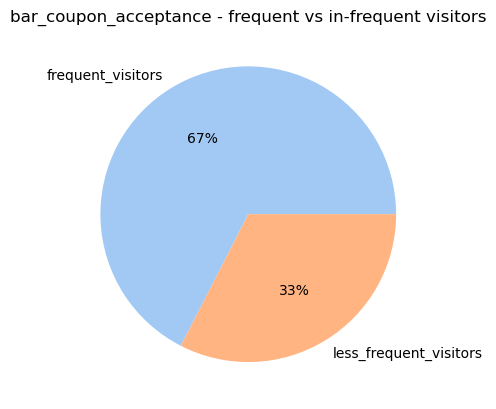

In [103]:
#define data
data = [proportion_of_bar_coupon_acceptance_frequent_visitors, proportion_of_bar_coupon_acceptance_less_frequent_visitors]
labels = ['frequent_visitors', 'less_frequent_visitors']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('bar_coupon_acceptance - frequent vs in-frequent visitors')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?

In [106]:
# Let's create a function that checks for both the conditions and return 1 or 0

def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['46', '26', '31', '41', '50plus', '36']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above

df_bar_coupons['Bar_Frequent_Age'] = df_bar_coupons.apply(conditions, axis=1)

/var/folders/tt/hs7zz4g973j0fv52r83jp5gm0000gn/T/ipykernel_42915/2058818700.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
# Let's validate the outcome whether it works based on the conditions applied

df_bar_coupons[['Bar','age','Bar_Frequent_Age']].sample(10)

,Bar,age,Bar_Frequent_Age
6748,1~3,21,0
7671,never,36,0
8315,1~3,26,1
2439,1~3,21,0
2148,never,36,0
10018,4~8,26,1
8519,1~3,21,0
9396,4~8,21,0
1437,never,46,0
10567,4~8,26,1


In [110]:
# Lets first calculate the bar coupon accepted count for high frequent vistors with elderly age

bar_coupon_accepted_more_frequent_visitors_elder_age = df_bar_coupons.query("Bar_Frequent_Age == 1")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for frequent visitors with elderly age

total_bar_coupon_offered_frequent_visitors_elder_age = df_bar_coupons.query("Bar_Frequent_Age == 1")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for frequent visitors with elderly age

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age = round((bar_coupon_accepted_more_frequent_visitors_elder_age/total_bar_coupon_offered_frequent_visitors_elder_age)*100,2)

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age

69.52

In [112]:
# Lets first calculate the bar coupon accepted count for less frequent vistors with younger age

bar_coupon_accepted_less_frequent_visitors_younger_age = df_bar_coupons.query("Bar_Frequent_Age == 0")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for less frequent vistors with younger age

total_bar_coupon_offered_less_frequent_visitors_younger_age = df_bar_coupons.query("Bar_Frequent_Age == 0")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for less frequent vistors with younger age

proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age = round((bar_coupon_accepted_less_frequent_visitors_younger_age/total_bar_coupon_offered_less_frequent_visitors_younger_age)*100,2)

proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age

33.5

# @Finding

From above, we can find the 'frequent elderly visitors' to bar have accepted the coupons to the most (69%) compared to 'less frequent young visitors' who have showed only less interest (33%)

### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [120]:
df_bar_coupons['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [122]:
# Let's create a function that checks for all 3 conditions and return 1 or 0

def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['21','46', '26', '31', '41', '50plus', '36'] and s['occupation'] not in ['Farming Fishing & Forestry']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above

df_bar_coupons['Bar_Frequent_Age_Job'] = df_bar_coupons.apply(conditions, axis=1)

/var/folders/tt/hs7zz4g973j0fv52r83jp5gm0000gn/T/ipykernel_42915/151662364.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [124]:
# Let's validate the outcome whether it works based on the conditions applied

df_bar_coupons[['Bar','age','occupation','Bar_Frequent_Age_Job']].sample(10)

,Bar,age,occupation,Bar_Frequent_Age_Job
10799,gt8,31,Legal,1
5335,never,26,Student,0
3817,never,21,Education&Training&Library,0
10494,1~3,below21,Student,0
1342,never,46,Sales & Related,0
1393,never,50plus,Retired,0
432,never,26,Computer & Mathematical,0
12225,less1,21,Healthcare Support,0
4501,1~3,36,Legal,1
9432,never,36,Business & Financial,0


In [126]:
# Lets first calculate the bar coupon accepted count for high frequent vistors with elderly age and not farming/fishing job

bar_coupon_accepted_more_frequent_visitors_elder_age_job = df_bar_coupons.query("Bar_Frequent_Age_Job == 1")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for frequent visitors with elderly age and not farming/fishing job

total_bar_coupon_offered_frequent_visitors_elder_age_job = df_bar_coupons.query("Bar_Frequent_Age_Job == 1")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for frequent visitors with elderly age and not farming/fishing job

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_job = round((bar_coupon_accepted_more_frequent_visitors_elder_age_job/total_bar_coupon_offered_frequent_visitors_elder_age_job)*100,2)

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_job

69.28

In [128]:
# Lets first calculate the bar coupon accepted count for less frequent vistors with younger age and specific job

bar_coupon_accepted_less_frequent_visitors_younger_age_job = df_bar_coupons.query("Bar_Frequent_Age_Job == 0")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for less frequent vistors with younger age and specific job

total_bar_coupon_offered_less_frequent_visitors_younger_age_job = df_bar_coupons.query("Bar_Frequent_Age_Job == 0")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for less frequent vistors with younger age and specific job

proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age_job = round((bar_coupon_accepted_less_frequent_visitors_younger_age_job/total_bar_coupon_offered_less_frequent_visitors_younger_age_job)*100,2)

proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age_job

29.42

@Finding

From above, we can find the 'frequent elderly visitors without farming/fishing/forestry job' to bar have accepted the coupons to the most (70%) compared to 'less frequent young visitors with farming/fishing/forestry job' who have showed only less interest (30%)

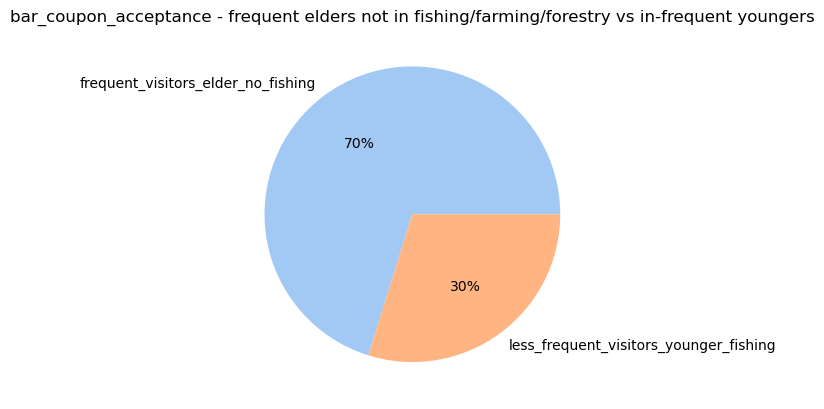

In [131]:
#define data
data = [proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_job, proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age_job]
labels = ['frequent_visitors_elder_no_fishing', 'less_frequent_visitors_younger_fishing']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('bar_coupon_acceptance - frequent elders not in fishing/farming/forestry vs in-frequent youngers')
plt.show()

## Compare the acceptance rates between those drivers who:
go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
go to bars more than once a month and are under the age of 30 OR
go to cheap restaurants more than 4 times a month and income is less than 50K.

In [139]:
df_bar_coupons['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [141]:
# Let's create a function that checks for all first 3 conditions and return 1 or 0

def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['21','46', '26', '31', '41', '50plus', '36'] and s['maritalStatus'] not in ['Widowed']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above

df_bar_coupons['Bar_Frequent_Age_Marital'] = df_bar_coupons.apply(conditions, axis=1)

/var/folders/tt/hs7zz4g973j0fv52r83jp5gm0000gn/T/ipykernel_42915/3270510010.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [143]:
# Let's validate the outcome whether it works based on the conditions applied

df_bar_coupons[['Bar','age','maritalStatus','Bar_Frequent_Age_Marital']].sample(10)

,Bar,age,maritalStatus,Bar_Frequent_Age_Marital
10617,less1,31,Divorced,0
756,1~3,50plus,Married partner,1
4903,never,31,Married partner,0
10162,less1,31,Married partner,0
10154,less1,31,Married partner,0
3281,less1,31,Married partner,0
2284,less1,41,Single,0
2002,never,21,Married partner,0
12610,never,50plus,Divorced,0
10778,never,31,Single,0


In [145]:
# Lets first calculate the bar coupon accepted count for high frequent vistors with elderly age and not widowed

bar_coupon_accepted_more_frequent_visitors_elder_age_not_widowed = df_bar_coupons.query("Bar_Frequent_Age_Marital == 1")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for frequent visitors with elderly age and not widowed

total_bar_coupon_offered_frequent_visitors_elder_age_not_widowed = df_bar_coupons.query("Bar_Frequent_Age_Marital == 1")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for frequent visitors with elderly age and not widowed

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_not_widowed = round((bar_coupon_accepted_more_frequent_visitors_elder_age_not_widowed/total_bar_coupon_offered_frequent_visitors_elder_age_not_widowed)*100,2)

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_not_widowed

69.28

In [147]:
# Let's create a function that checks for all second 2 conditions and return 1 or 0

def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['below21', '21', '26']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above

df_bar_coupons['Bar_Frequent_Age_30'] = df_bar_coupons.apply(conditions, axis=1)

/var/folders/tt/hs7zz4g973j0fv52r83jp5gm0000gn/T/ipykernel_42915/2519260336.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [149]:
# Let's validate the outcome whether it works based on the conditions applied

df_bar_coupons[['Bar','age','Bar_Frequent_Age_30']].sample(10)

,Bar,age,Bar_Frequent_Age_30
2178,4~8,21,1
9220,never,26,0
7431,less1,26,0
7615,never,36,0
12071,never,46,0
10955,never,31,0
10766,less1,31,0
12617,never,21,0
9410,never,50plus,0
8857,never,26,0


In [151]:
# Lets first calculate the bar coupon accepted count for high frequent vistors with younger age

bar_coupon_accepted_more_frequent_visitors_younger_age = df_bar_coupons.query("Bar_Frequent_Age_30 == 1")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for frequent visitors with younger age

total_bar_coupon_offered_frequent_visitors_younger_age = df_bar_coupons.query("Bar_Frequent_Age_30 == 1")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for frequent visitors with younger age

proportion_of_bar_coupon_acceptance_frequent_visitors_younger_age = round((bar_coupon_accepted_more_frequent_visitors_younger_age/total_bar_coupon_offered_frequent_visitors_younger_age)*100,2)

proportion_of_bar_coupon_acceptance_frequent_visitors_younger_age

72.17

In [153]:
df_bar_coupons['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [155]:
df_bar_coupons['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [157]:
# Let's create a function that checks for all second 2 conditions and return 1 or 0

def conditions(s):
    if s['RestaurantLessThan20'] in ['4~8', 'gt8'] and s['income'] in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above

df_bar_coupons['Bar_cheap_restaurant_low_income'] = df_bar_coupons.apply(conditions, axis=1)

/var/folders/tt/hs7zz4g973j0fv52r83jp5gm0000gn/T/ipykernel_42915/444200296.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [159]:
# Let's validate the outcome whether it works based on the conditions applied

df_bar_coupons[['RestaurantLessThan20','income','Bar_cheap_restaurant_low_income']].sample(10)

,RestaurantLessThan20,income,Bar_cheap_restaurant_low_income
7358,1~3,$37500 - $49999,0
6855,less1,$12500 - $24999,0
11473,gt8,$100000 or More,0
4822,1~3,$50000 - $62499,0
10596,less1,$50000 - $62499,0
11762,less1,$12500 - $24999,0
4844,1~3,$12500 - $24999,0
11378,1~3,$50000 - $62499,0
5645,1~3,$25000 - $37499,0
1261,1~3,Less than $12500,0


In [161]:
# Lets first calculate the bar coupon accepted count for cheap restaurant visitor with low income

bar_coupon_accepted_cheap_restaurant_low_income = df_bar_coupons.query("Bar_cheap_restaurant_low_income == 1")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for cheap restaurant visitor with low income

total_bar_coupon_offered_cheap_restaurant_low_income = df_bar_coupons.query("Bar_cheap_restaurant_low_income == 1")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for cheap restaurant visitor with low income

proportion_of_bar_coupon_acceptance_cheap_restaurant_low_income = round((bar_coupon_accepted_cheap_restaurant_low_income/total_bar_coupon_offered_cheap_restaurant_low_income)*100,2)

proportion_of_bar_coupon_acceptance_cheap_restaurant_low_income

45.35

#### @Finding

From above, we can find the 'frequent younger visitors' to bar have accepted the coupons to the most (39%) compared to 'frequent visitors that are elder and widowed' who have slightly less interest (37%) or 'frequent visitors to cheap restaurants with low income' who have even less interest (24%)

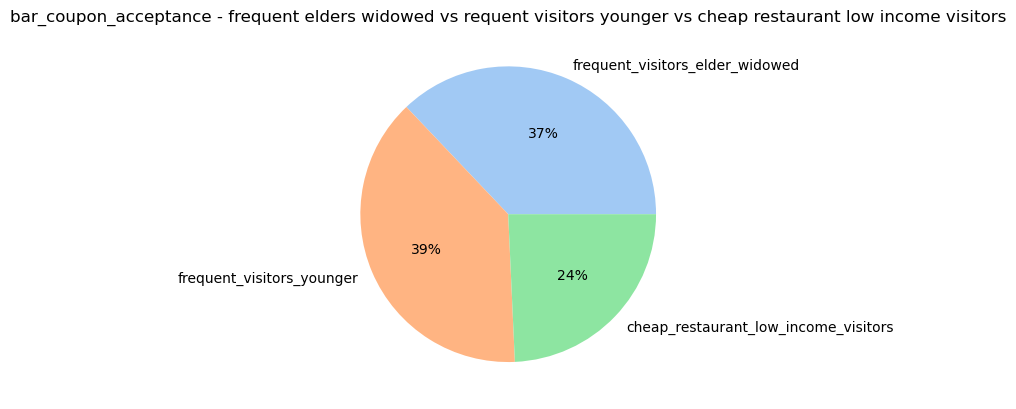

In [166]:
#define data
data = [proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_not_widowed, proportion_of_bar_coupon_acceptance_frequent_visitors_younger_age, proportion_of_bar_coupon_acceptance_cheap_restaurant_low_income]
labels = ['frequent_visitors_elder_widowed', 'frequent_visitors_younger', 'cheap_restaurant_low_income_visitors']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:3]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('bar_coupon_acceptance - frequent elders widowed vs requent visitors younger vs cheap restaurant low income visitors')
plt.show()

The 'more frequent visitors' to bar have accepted the coupons to the most (~76%) compared to the 'less frequent visitors' who have showed only less interest in coupon acceptance (~37%).

The 'frequent elderly visitors' to bar have accepted the coupons to the most (69%) compared to 'less frequent young visitors' who have showed only less interest (33%).

The 'frequent elderly visitors without farming/fishing/forestry job' to bar have accepted the coupons to the most (70%) compared to 'less frequent young visitors with farming/fishing/forestry job' who have showed only less interest (30%).

The 'frequent younger visitors' to bar have accepted the coupons to the most (39%) compared to 'frequent visitors that are elder and widowed' who have slightly less interest (37%) or 'frequent visitors to cheap restaurants with low income' who have even less interest (24%).

In general, those drivers, who has the habit of going to bar more frequently are taking advantage of the coupon and acceoting the same more compared to anyone else.

Drivers who are within low income or use cheap restaurants does not much care about the bar coupons and that was evident from the outcomes.

Independent Investigation
Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.



## Analyze coffee house coupons

In [171]:
# Let's create a new dataframe that is filtered for coffee house coupon only

df_coffee_coupons = df.query("coupon == 'Coffee House'")

In [173]:
# Let's take a look at the top 5 rows for coffee house data frame

df_coffee_coupons.head(5)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [175]:
# Let's find the number of rows and columns available

df_coffee_coupons.shape

(3996, 26)

In [177]:
# Lets first calculate the coffee house coupon accepted count

coffee_coupon_accepted = df_coffee_coupons['Y'].value_counts()[1]

# Lets calculate the total coffee house coupon offered count

total_coffee_coupon_offered = df_coffee_coupons['Y'].count()

# Lets calculate the proportion of coffee coupon acceptance from above values

proportion_of_coffee_coupon_acceptance = round((coffee_coupon_accepted/total_coffee_coupon_offered)*100,2)

proportion_of_coffee_coupon_acceptance

49.92

In [179]:
# Let's check the column data types once

df_coffee_coupons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  car                   37 non-null     object
 15  Bar                   3959 non-null   obje

In [183]:
# Let's make a copy of the numeric column for acceptance and then convert into string for better use in charts

df_coffee_coupons['acceptance'] = df_coffee_coupons['Y']

df_coffee_coupons['acceptance']=df_coffee_coupons['acceptance'].astype("string")

/var/folders/tt/hs7zz4g973j0fv52r83jp5gm0000gn/T/ipykernel_42915/2236306370.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/tt/hs7zz4g973j0fv52r83jp5gm0000gn/T/ipykernel_42915/2236306370.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [185]:
# Let's validate if the column has been created with appropriate data type

print(df_coffee_coupons.dtypes)

destination                     object
passanger                       object
weather                         object
temperature                      int64
time                            object
coupon                          object
expiration                      object
gender                          object
age                             object
maritalStatus                   object
has_children                     int64
education                       object
occupation                      object
income                          object
car                             object
Bar                             object
CoffeeHouse                     object
CarryAway                       object
RestaurantLessThan20            object
Restaurant20To50                object
toCoupon_GEQ5min                 int64
toCoupon_GEQ15min                int64
toCoupon_GEQ25min                int64
direction_same                   int64
direction_opp                    int64
Y                        

In [187]:
# For better readbaility, lets replace the value 1 as 'Accepted' & 0 as 'Not Accepted'

df_coffee_coupons['acceptance'] = df_coffee_coupons['acceptance'].str.replace('1', 'Accepted')
df_coffee_coupons['acceptance'] = df_coffee_coupons['acceptance'].str.replace('0', 'Not Accepted')

/var/folders/tt/hs7zz4g973j0fv52r83jp5gm0000gn/T/ipykernel_42915/615226601.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/tt/hs7zz4g973j0fv52r83jp5gm0000gn/T/ipykernel_42915/615226601.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [189]:
# Validate if the replaced values are showing up

df_coffee_coupons['acceptance'].unique()

<StringArray>
['Not Accepted', 'Accepted']
Length: 2, dtype: string

Text(0.5, 1.0, 'Distribution of Accepted Coffee Coupons')

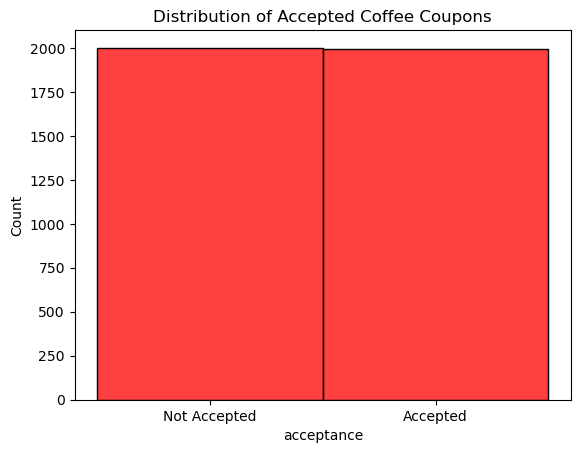

In [191]:
# Lets create a histogram based on the coffee coupon acceptance overall

g1 = sns.histplot(data=df_coffee_coupons, x='acceptance', color='red')
g1.set_title('Distribution of Accepted Coffee Coupons')

In [193]:
df_coffee_coupons['passanger'].unique()

array(['Friend(s)', 'Kid(s)', 'Alone', 'Partner'], dtype=object)

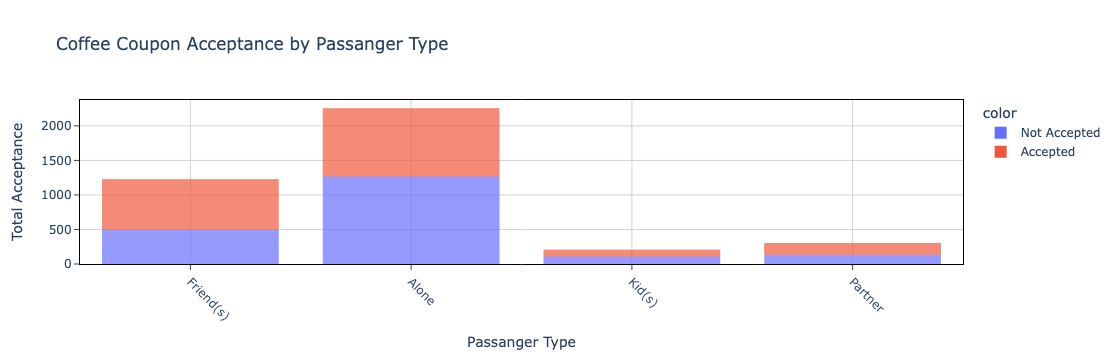

In [209]:
# Lets create a barplot based on the coffee coupon acceptance, by passengers 

fig = px.bar(df_coffee_coupons['passanger'], color=df_coffee_coupons['acceptance'], 
             title = 'Coffee Coupon Acceptance by Passanger Type',
            labels={'value':'Passanger Type',
                   'count':'Total Acceptance'}
            )

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    tickangle = 45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

fig.update_traces(marker_line_width = 0,
                  selector=dict(type="bar"))

fig.update_layout(bargap=0.2,
                  bargroupgap = 0,
                 )
fig.show()

In [235]:
# Corrected bar plot for coffee coupon acceptance by income

@Finding

Income does not influence much when it comes to coffee coupon acceptance and it mostly shows around 50% acceptance on all income groups.



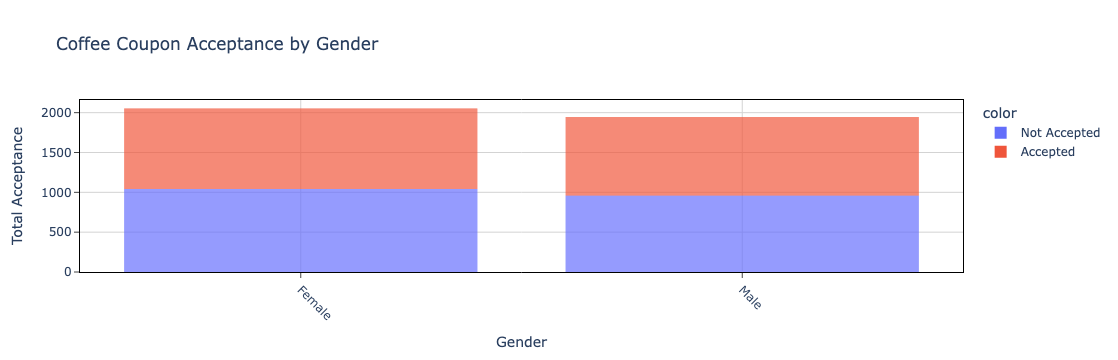

In [241]:
# Lets create a barplot based on the coffee coupon acceptance, by gender 

fig = px.bar(df_coffee_coupons['gender'], color=df_coffee_coupons['acceptance'], 
             title = 'Coffee Coupon Acceptance by Gender',
            labels={'value':'Gender',
                   'count':'Total Acceptance'}
            )

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    tickangle = 45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

fig.update_traces(marker_line_width = 0,
                  selector=dict(type="bar"))

fig.update_layout(bargap=0.2,
                  bargroupgap = 0,
                 )
fig.show()

@Finding

Gender does not influence much either when it comes to coffee coupon acceptance and it mostly shows around 50% acceptance for both male and female.

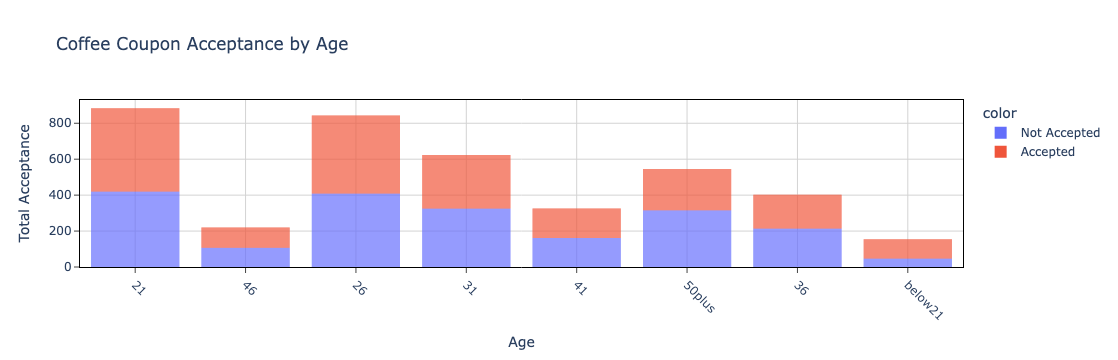

In [244]:
# Lets create a barplot based on the coffee coupon acceptance, by age 

fig = px.bar(df_coffee_coupons['age'], color=df_coffee_coupons['acceptance'], 
             title = 'Coffee Coupon Acceptance by Age',
            labels={'value':'Age',
                   'count':'Total Acceptance'}
            )

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    tickangle = 45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

fig.update_traces(marker_line_width = 0,
                  selector=dict(type="bar"))

fig.update_layout(bargap=0.2,
                  bargroupgap = 0,
                 )

fig.show()

@Finding

It is interesting to notice the young drivers with age below 21 has higher acceptance for coffee coupons, whereas elderly population with 50 plus shows slightly less acceptance but all other intermediate groups show around 50% acceptance.

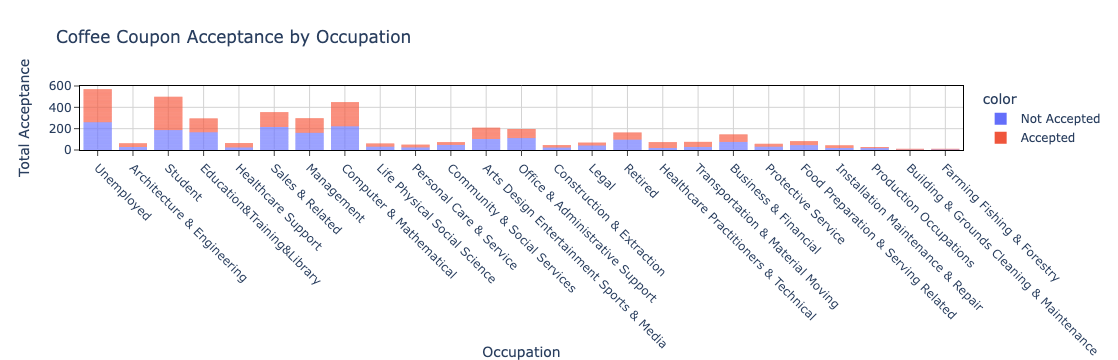

In [247]:
# Lets create a barplot based on the coffee coupon acceptance, by occupation 

fig = px.bar(df_coffee_coupons['occupation'], color=df_coffee_coupons['acceptance'], 
             title = 'Coffee Coupon Acceptance by Occupation',
            labels={'value':'Occupation',
                   'count':'Total Acceptance'}
            )

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    tickangle = 45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

fig.update_traces(marker_line_width = 0,
                  selector=dict(type="bar"))

fig.update_layout(bargap=0.2,
                  bargroupgap = 0,
                 )
fig.show()

@Finding

There is wide acceptance of coffee coupon from students, unemployed folks. Drivers belong to 'building/grounds cleaning/maintenance' have close to 100% acceptance, similar case for 'farmiing/fishing/forestry' & 'healthcare' jobs as well. 'Sales' job folks show comparatively less interest on coffee coupons.

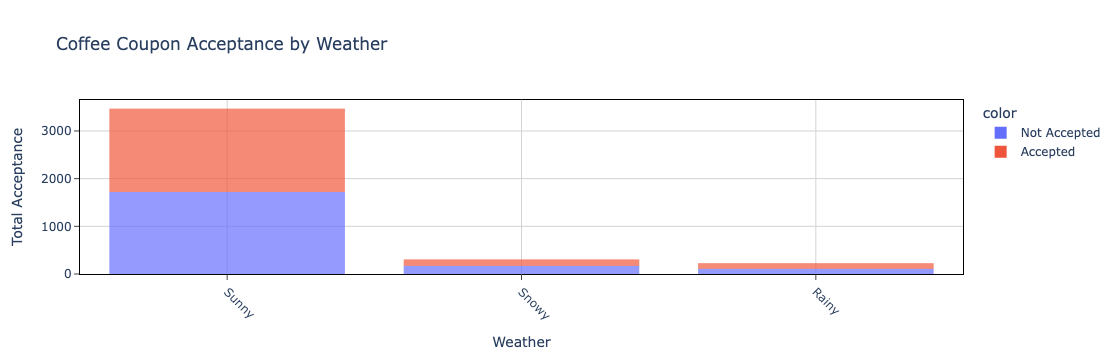

In [251]:
# Lets create a barplot based on the coffee coupon acceptance, by weather 

fig = px.bar(df_coffee_coupons['weather'], color=df_coffee_coupons['acceptance'], 
             title = 'Coffee Coupon Acceptance by Weather',
            labels={'value':'Weather',
                   'count':'Total Acceptance'}
            )

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    tickangle = 45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

fig.update_traces(marker_line_width = 0,
                  selector=dict(type="bar"))

fig.update_layout(bargap=0.2,
                  bargroupgap = 0,
                 )
fig.show()

@Finding

While one can normally think the weather could play a role in coffee consumption, but it was not creating any impact in acceptance of coupons. Infact, the acceptance was slightly low when snowy, so the guess is the driving comfort could have influenced.